Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_complete_df = pd.merge(study_results_df, mouse_metadata_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
study_complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
mice_count = len(study_complete_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint 
duplicate_rows = study_complete_df[study_complete_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice = duplicate_rows["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID
same_mouse = study_complete_df.loc[study_complete_df["Mouse ID"]== "g989"]
same_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data_df = study_complete_df[study_complete_df["Mouse ID"].isin(duplicate_mice) ==False]
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame
new_mouse_count = len(clean_data_df["Mouse ID"].unique())
new_mouse_count

248

Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# Mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a singe summary DataFrame

tumor_volume_mean = clean_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_volume_median = clean_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_volume_variance = clean_data_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_standard_deviation = clean_data_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_SEM = clean_data_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_statistics = pd.DataFrame({"Tumor Volume Mean" : tumor_volume_mean,
                                  "Tumor Volume Median" : tumor_volume_median, 
                                  "Tumor Volume Variance" : tumor_volume_variance,
                                  "Tumor Volume Standard Deviation" : tumor_volume_standard_deviation,
                                  "Tumor Volume SEM" : tumor_volume_SEM})

summary_statistics = summary_statistics[["Tumor Volume Mean", "Tumor Volume Median", 
                                        "Tumor Volume Variance", "Tumor Volume Standard Deviation",
                                        "Tumor Volume SEM"]]

summary_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_table = clean_data_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":
                                                          ["mean", "median", "var", "std", "sem"]})
summary_table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

Bar and Pie Charts 

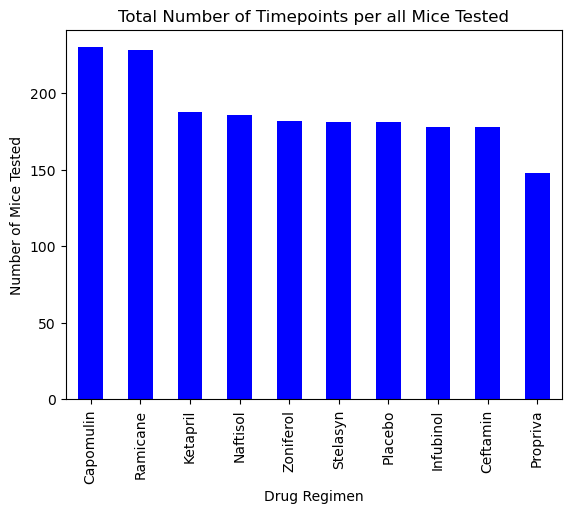

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas
mice_tested = clean_data_df["Drug Regimen"].value_counts()
mice_chart = mice_tested.plot(kind="bar", color="blue", title="Total Number of Timepoints per all Mice Tested",
                             xlabel="Drug Regimen", ylabel="Number of Mice Tested")
plt.show()

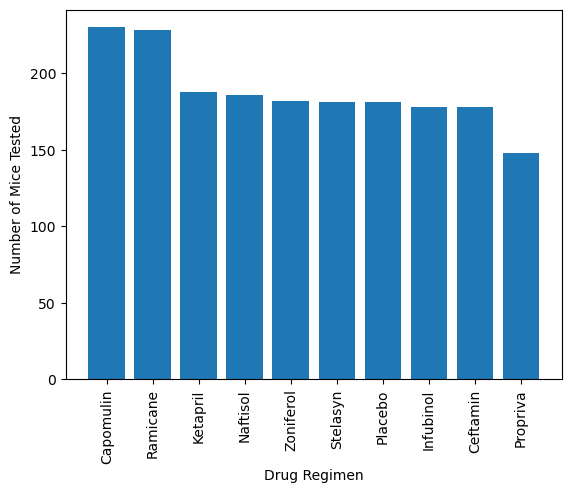

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
counts = clean_data_df["Drug Regimen"].value_counts()
plt.bar(counts.index.values, counts.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice Tested")
plt.show()


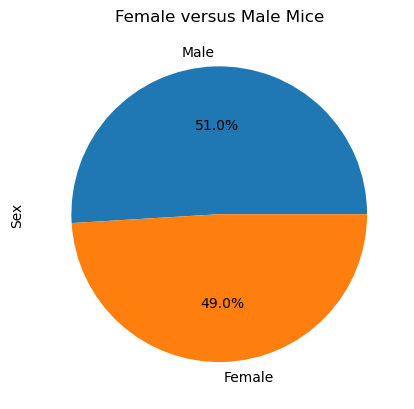

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fem_vs_male = clean_data_df["Sex"].value_counts()
fem_vs_male.plot(kind="pie", title="Female versus Male Mice", autopct="%1.1f%%", shadow=False)
plt.show()

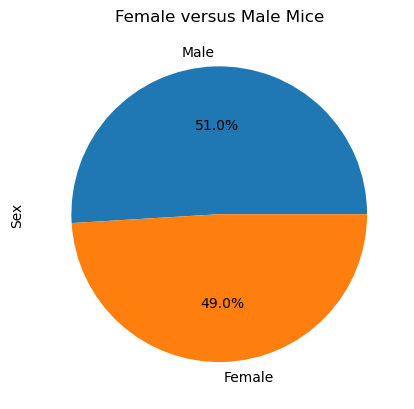

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts2 = clean_data_df["Sex"].value_counts()
labels = ["Male", "Female"]
plt.pie(counts2.values, autopct="%1.1f%%", labels=labels)
plt.title("Female versus Male Mice")
plt.ylabel("Sex")
plt.show()

Quartiles, Outliers, and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse 
max_tumor = clean_data_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(clean_data_df, on=['Mouse ID', 'Timepoint'], how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

list_of_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []

for drugs in list_of_drugs:
    quartiles = max_tumor[drugs].quartile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
print(f'The lower quartile of {drugs} treatment is : {lowerq}')
print(f'The upper quartile of {drugs} treatment is : {upperq}')
print(f'The interquartile range of {drug} treatment is : {iqr}')
print(f'Values below {lower_bound} could be {drugs} outliers.')
print(f'Values above {upper_bound} could be {drugs} outliers.')


KeyError: 'Capomulin'

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and liner regression model
# for mouse weight and average tumor volume for the Capomulin regimen